# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [6]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers

## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [10]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=64, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.0005), bias_regularizer=regularizers.l2(0.0005)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0005), bias_regularizer=regularizers.l2(0.0005))) 
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 224, 224, 64)      3136      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 56, 56, 256)       131328    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 512)       524800    
__________

### Train

In [12]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch26.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
200/200 [==============================] - 131s 655ms/step - loss: 5.2873 - acc: 0.0067 - val_loss: 5.1933 - val_acc: 0.0132

Epoch 00001: val_loss improved from inf to 5.19332, saving model to Saved_Models/weights.best.from_scratch26.hdf5
Epoch 2/200
200/200 [==============================] - 125s 627ms/step - loss: 5.1880 - acc: 0.0119 - val_loss: 5.1684 - val_acc: 0.0164

Epoch 00002: val_loss improved from 5.19332 to 5.16844, saving model to Saved_Models/weights.best.from_scratch26.hdf5
Epoch 3/200
200/200 [==============================] - 125s 625ms/step - loss: 5.1517 - acc: 0.0119 - val_loss: 5.1532 - val_acc: 0.0139

Epoch 00003: val_loss improved from 5.16844 to 5.15324, saving model to Saved_Models/weights.best.from_scratch26.hdf5
Epoch 4/200
200/200 [==============================] - 126s 628ms/step - loss: 5.1197 - acc: 0.0170 - val_loss: 5.0932 - val_acc: 0.0179

Epoch 00004: val_loss improved from 5.15324 to 5.0


Epoch 00034: val_loss did not improve from 4.48152
Epoch 35/200
200/200 [==============================] - 126s 628ms/step - loss: 3.8009 - acc: 0.1681 - val_loss: 4.5357 - val_acc: 0.1101

Epoch 00035: val_loss did not improve from 4.48152
Epoch 36/200
200/200 [==============================] - 126s 628ms/step - loss: 3.7899 - acc: 0.1761 - val_loss: 4.5116 - val_acc: 0.0978

Epoch 00036: val_loss did not improve from 4.48152
Epoch 37/200
200/200 [==============================] - 125s 625ms/step - loss: 3.7358 - acc: 0.1892 - val_loss: 4.4950 - val_acc: 0.1028

Epoch 00037: val_loss did not improve from 4.48152
Epoch 38/200
200/200 [==============================] - 125s 626ms/step - loss: 3.6718 - acc: 0.1922 - val_loss: 4.4933 - val_acc: 0.1126

Epoch 00038: val_loss did not improve from 4.48152
Epoch 39/200
200/200 [==============================] - 125s 627ms/step - loss: 3.6999 - acc: 0.1923 - val_loss: 4.3704 - val_acc: 0.1267

Epoch 00039: val_loss improved from 4.48152 to 4.

200/200 [==============================] - 125s 627ms/step - loss: 2.4767 - acc: 0.4048 - val_loss: 4.4734 - val_acc: 0.1931

Epoch 00076: val_loss did not improve from 4.20086
Epoch 77/200
200/200 [==============================] - 125s 625ms/step - loss: 2.4978 - acc: 0.3909 - val_loss: 4.3873 - val_acc: 0.1984

Epoch 00077: val_loss did not improve from 4.20086
Epoch 78/200
200/200 [==============================] - 126s 629ms/step - loss: 2.4506 - acc: 0.4003 - val_loss: 4.5285 - val_acc: 0.1667

Epoch 00078: val_loss did not improve from 4.20086
Epoch 79/200
200/200 [==============================] - 125s 627ms/step - loss: 2.4372 - acc: 0.4070 - val_loss: 4.3482 - val_acc: 0.1745

Epoch 00079: val_loss did not improve from 4.20086
Epoch 80/200
200/200 [==============================] - 125s 627ms/step - loss: 2.3970 - acc: 0.4214 - val_loss: 4.3424 - val_acc: 0.1820

Epoch 00080: val_loss did not improve from 4.20086
Epoch 81/200
200/200 [==============================] - 126s 62

200/200 [==============================] - 126s 629ms/step - loss: 1.7491 - acc: 0.5519 - val_loss: 4.4515 - val_acc: 0.2236

Epoch 00119: val_loss did not improve from 4.20086
Epoch 120/200
200/200 [==============================] - 125s 625ms/step - loss: 1.7150 - acc: 0.5570 - val_loss: 4.7440 - val_acc: 0.2139

Epoch 00120: val_loss did not improve from 4.20086
Epoch 121/200
200/200 [==============================] - 126s 629ms/step - loss: 1.7466 - acc: 0.5522 - val_loss: 4.6542 - val_acc: 0.2148

Epoch 00121: val_loss did not improve from 4.20086
Epoch 122/200
200/200 [==============================] - 125s 627ms/step - loss: 1.7270 - acc: 0.5556 - val_loss: 4.5346 - val_acc: 0.2277

Epoch 00122: val_loss did not improve from 4.20086
Epoch 123/200
200/200 [==============================] - 126s 630ms/step - loss: 1.7400 - acc: 0.5495 - val_loss: 4.4955 - val_acc: 0.2250

Epoch 00123: val_loss did not improve from 4.20086
Epoch 124/200
200/200 [==============================] - 12

200/200 [==============================] - 125s 624ms/step - loss: 1.3913 - acc: 0.6352 - val_loss: 5.1109 - val_acc: 0.2314

Epoch 00162: val_loss did not improve from 4.20086
Epoch 163/200
200/200 [==============================] - 125s 627ms/step - loss: 1.3607 - acc: 0.6425 - val_loss: 5.4182 - val_acc: 0.2114

Epoch 00163: val_loss did not improve from 4.20086
Epoch 164/200
200/200 [==============================] - 125s 623ms/step - loss: 1.3841 - acc: 0.6400 - val_loss: 4.8048 - val_acc: 0.2060

Epoch 00164: val_loss did not improve from 4.20086
Epoch 165/200
200/200 [==============================] - 125s 624ms/step - loss: 1.2794 - acc: 0.6553 - val_loss: 5.0190 - val_acc: 0.2475

Epoch 00165: val_loss did not improve from 4.20086
Epoch 166/200
200/200 [==============================] - 126s 629ms/step - loss: 1.3341 - acc: 0.6553 - val_loss: 5.1614 - val_acc: 0.2332

Epoch 00166: val_loss did not improve from 4.20086
Epoch 167/200
200/200 [==============================] - 12

In [13]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,5.193322,0.013208,5.288071,0.006748
1,1.0,5.168441,0.016352,5.188097,0.011927
2,2.0,5.153243,0.013924,5.151455,0.011927
3,3.0,5.093188,0.017925,5.120226,0.017106
4,4.0,5.069837,0.026415,5.087502,0.020245
5,5.0,5.054604,0.027215,5.039518,0.022756
6,6.0,5.029298,0.031132,5.005240,0.025267
7,7.0,5.002702,0.028616,4.983149,0.024325
8,8.0,4.980782,0.035759,4.946538,0.029661
9,9.0,4.969286,0.029560,4.925151,0.030760


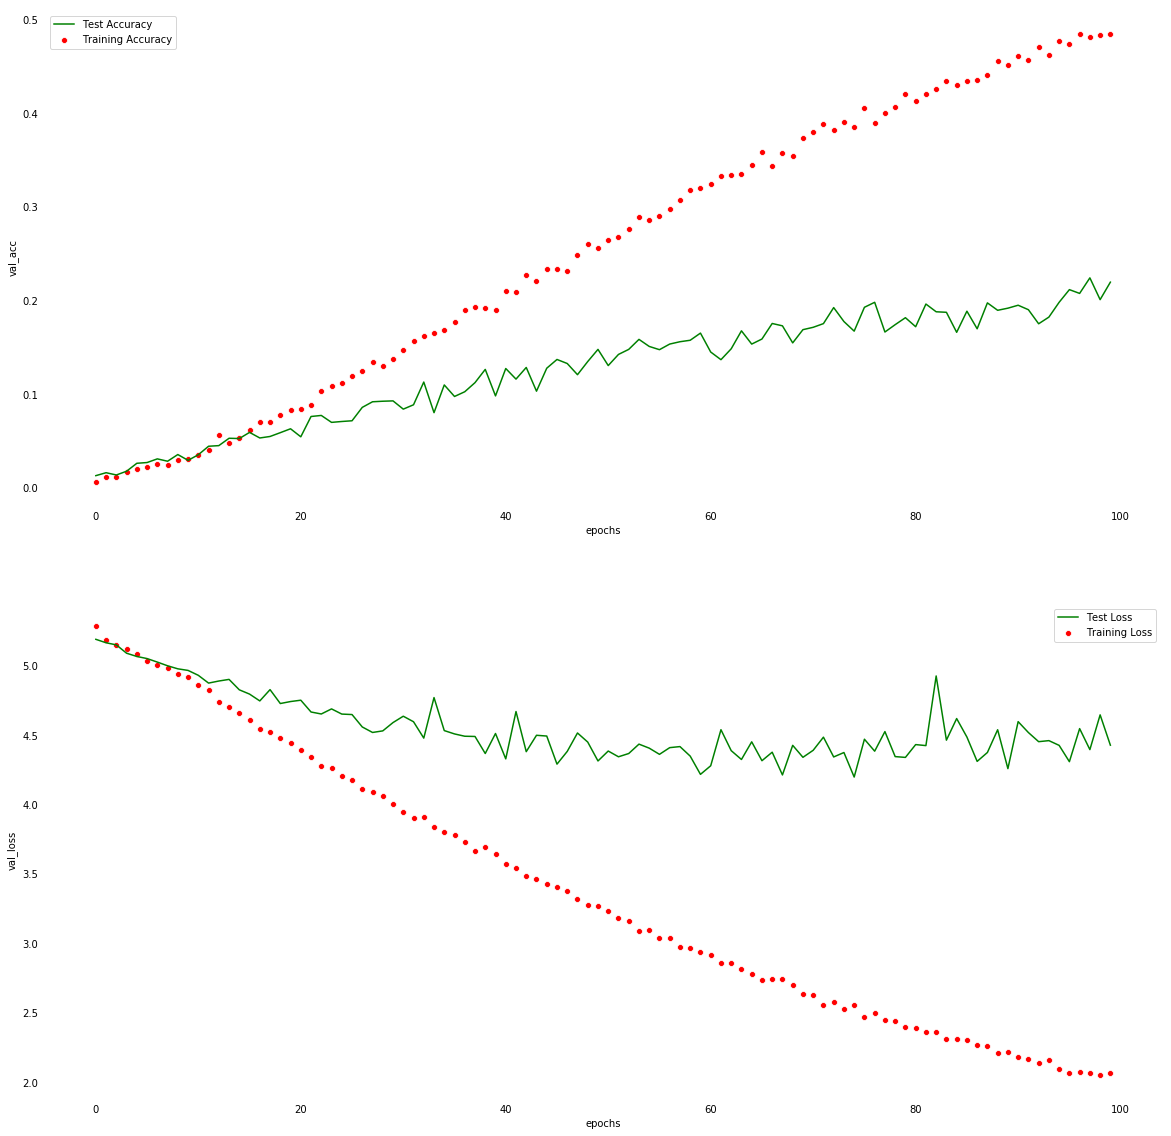

In [14]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters